In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [11]:
def edge_probability_distribution(mean, std_dev):
    return np.random.lognormal(mean, std_dev)


In [12]:
def generate_graph(n, mean, std_dev, p):
    G = nx.Graph()  # Create an empty graph
    G.add_nodes_from(range(n))  # Add n nodes numbered from 0 to n-1

    # Iterate through each pair of nodes
    for i in range(n):
        for j in range(i+1, n):
            # Get the probability for the current edge from the distribution
            if random.random() < p:
                edge_prob = edge_probability_distribution(mean, std_dev)
                # Add an edge between nodes i and j with the probability from the distribution
                if random.random() < edge_prob:
                    G.add_edge(i, j)
                
    return G

In [13]:
def analyze_graph(G):
    giant_cluster_size = 0  # Initialize giant cluster size to 0
    
    # Iterate through connected components of the graph
    for component in nx.connected_components(G):
        # Update the giant cluster size if the current component is larger
        if len(component) > giant_cluster_size:
            giant_cluster_size = len(component)

    return giant_cluster_size / G.number_of_nodes()  # Calculate the ratio of the giant cluster size to the total number of nodes


In [4]:
def analyze_graph(G):
    giant_cluster_size = 0  # Initialize giant cluster size to 0
    
    # Iterate through connected components of the graph
    for component in nx.connected_components(G):
        # Update the giant cluster size if the current component is larger
        if len(component) > giant_cluster_size:
            giant_cluster_size = len(component)

    return giant_cluster_size / G.number_of_nodes()  # Calculate the ratio of the giant cluster size to the total number of nodes


In [14]:
n = 100  # Number of nodes
mean = -2.3  # Mean of the underlying normal distribution for edge probabilities
std_dev = 0.3  # Standard deviation of the underlying normal distribution for edge probabilities

# Define the range of edge probabilities to iterate over
p_values = np.linspace(0.01, 1, num=100)

# Initialize lists to store results
avg_ratios = []
std_devs = []

In [15]:
# Iterate over each edge probability
for p in p_values:
    ratios = []
    
    # Generate multiple graphs and calculate giant cluster ratio for each graph
    for i in range(10):
        G = generate_graph(n, mean, std_dev, p)
        giant_cluster_ratio = analyze_graph(G)
        ratios.append(giant_cluster_ratio)
    
    # Calculate the average and standard deviation of the giant cluster ratios for the current edge probability
    avg_ratio = np.mean(ratios)
    std_dev = np.std(ratios)
    
    # Append the results to the lists
    avg_ratios.append(avg_ratio)
    std_devs.append(std_dev)


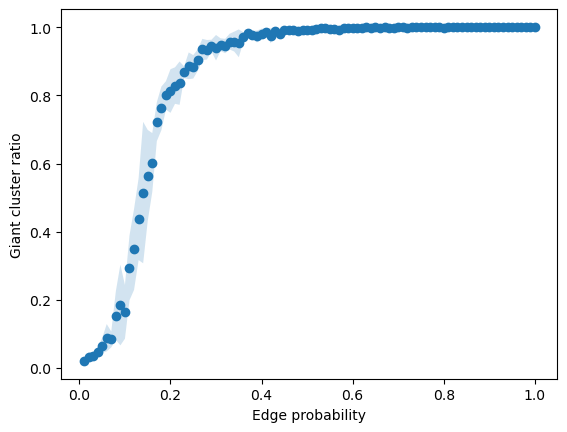

In [16]:
fig, ax = plt.subplots()
ax.plot(p_values, avg_ratios, 'o')
ax.fill_between(p_values, np.array(avg_ratios) - np.array(std_devs), np.array(avg_ratios) + np.array(std_devs), alpha=0.2)
ax.set_xlabel('Edge probability')
ax.set_ylabel('Giant cluster ratio')
plt.show()

In the provided code, we have generated an undirected graph with n nodes using the log-normal distribution to define the probabilities of edge connections. The log-normal distribution is derived from an underlying normal distribution with a mean (μ) and standard deviation (σ). The probability distribution function of a log-normal distribution is given by:

\begin{equation}
p(x) = \frac{1}{x\sigma\sqrt{2\pi}} \cdot e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}
\end{equation}


To create the graph, we iterated over all pairs of nodes and used a uniform random number generator to determine if an edge should be considered for connection (with a probability p). If the edge was considered, we generated a random probability from the log-normal distribution and used another uniform random number generator to decide whether to connect the nodes with the probability obtained from the distribution.

To study the phase transition of the graph, we varied the edge consideration probability p and calculated the giant cluster ratio, which is the ratio of the largest connected component size to the total number of nodes in the graph. By averaging the giant cluster ratios for multiple graph realizations with the same edge consideration probability, we obtained a phase diagram that shows the relationship between the edge consideration probability and the giant cluster ratio.

The phase diagram demonstrates how the graph transitions from having local clusters to a global cluster as the edge consideration probability increases. The error bars in the phase diagram represent the standard deviation of the giant cluster ratios calculated for each edge consideration probability. This phase diagram can provide insights into the percolation properties and critical points of the graph as the edge consideration probability changes.